In [1]:
from specarray import SpecArray
from pathlib import Path
import matplotlib.pyplot as plt


Defining a folder where all the data is stored:

In [2]:
data_dir = Path("data/white_weathering_crust_2_2023-07-15_15-25-24/")


The Folder contains the folders capture whith hdr and raw files

In [3]:
capture_folder = data_dir / "capture"
list(capture_folder.glob("*"))


[PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/DARKREF_QDTest_near_steak_3_white2_2023-07-15_15-25-24.log'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/QDTest_near_steak_3_white2_2023-07-15_15-25-24.log'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/DARKREF_QDTest_near_steak_3_white2_2023-07-15_15-25-24.raw'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/QDTest_near_steak_3_white2_2023-07-15_15-25-24.raw'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/WHITEREF_QDTest_near_steak_3_white2_2023-07-15_15-25-24.hdr'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/WHITEREF_QDTest_near_steak_3_white2_2023-07-15_15-25-24.log'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/WHITEREF_QDTest_near_steak_3_white2_2023-07-15_15-25-24.raw'),
 PosixPath('data/white_weathering_crust_2_2023-07-15_15-25-24/capture/QDTest_near_steak_3

Now make in instance of SpecArray and read the data:

In [4]:
white_weathering_crust = SpecArray.from_folder(data_dir)


/usr/local/lib/python3.11/site-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


The SpecArray instance contains the data and the metadata in the form of xarray.DataArrays which are parallel processed with dask.
The main data is in the "capture" property

In [5]:
white_weathering_crust.capture


<xarray.DataArray 'capture' (sample: 595, wavelength: 448, point: 1024)>
dask.array<array, shape=(595, 448, 1024), dtype=uint16, chunksize=(146, 448, 1024), chunktype=numpy.ndarray>
Coordinates:
  * wavelength  (wavelength) float64 397.0 398.3 399.6 ... 1.003e+03 1.005e+03
Dimensions without coordinates: sample, point

They are 3 dimensions: 
* sample: i.e. the number of the frame
* point: i.e. the number of the pixel of the line camera
* wavelength: i.e. the number of the wavelength at each band

In [6]:
white_weathering_crust.capture.dims


('sample', 'wavelength', 'point')

With this you can already do a lot with all the functionallity of xarray with the processing power of dask. But lets move on to the spectral albedo.
The spectral albedo is processed from the black and white reference data. It is just a property which is calcuated when needed.

In [7]:
white_weathering_crust.has_black


True

In [8]:
white_weathering_crust.black.mean("sample").max().compute()


<xarray.DataArray 'black' ()>
array(295.54)

In [9]:
white_weathering_crust.white.mean("sample").max().compute()


<xarray.DataArray 'white' ()>
array(4031.71)

In [10]:
white_weathering_crust.has_white


True

In [11]:
white_weathering_crust.spectral_albedo


<xarray.DataArray 'spectral albedo' (sample: 595, wavelength: 448, point: 1024)>
dask.array<where, shape=(595, 448, 1024), dtype=float64, chunksize=(146, 448, 1024), chunktype=numpy.ndarray>
Coordinates:
  * wavelength  (wavelength) float64 397.0 398.3 399.6 ... 1.003e+03 1.005e+03
Dimensions without coordinates: sample, point

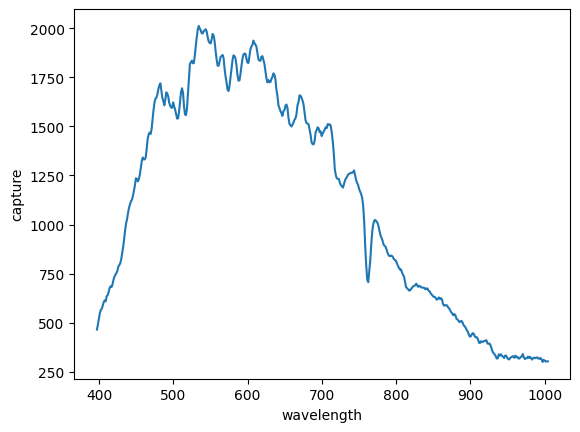

In [12]:
white_weathering_crust.capture.sel(sample=0, point=0).plot.line()


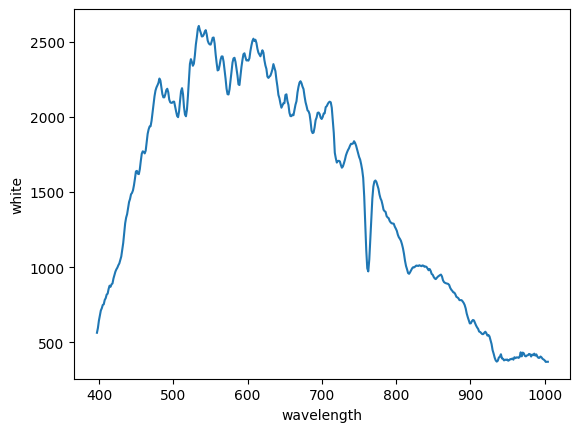

In [13]:
white_weathering_crust.white.sel(sample=0, point=0).plot.line()


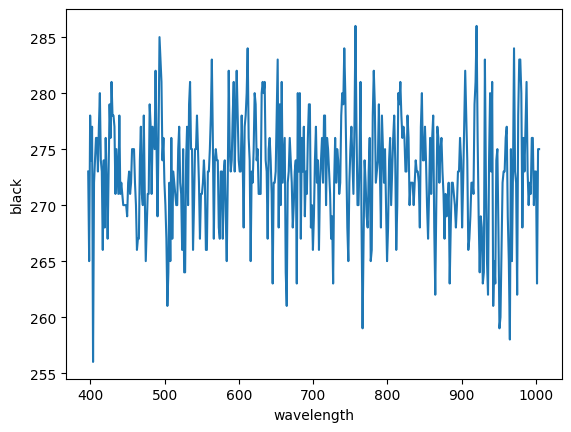

In [14]:
white_weathering_crust.black.sel(sample=0, point=0).plot.line()


All right lets have a look at the first sample and point:

(0.0, 1.0)

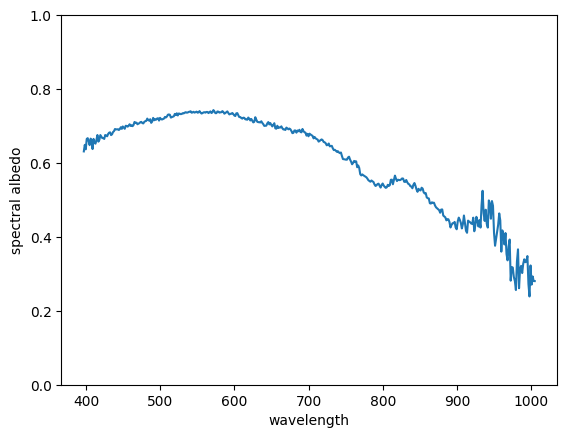

In [15]:
white_weathering_crust.spectral_albedo.sel(sample=0, point=0).plot.line()
plt.ylim(0, 1)


In [16]:
white_weathering_crust.spectral_albedo.max().compute()


<xarray.DataArray 'spectral albedo' ()>
array(0.77272073)

In [17]:
white_weathering_crust.spectral_albedo.sel(sample=0).max().compute()


<xarray.DataArray 'spectral albedo' ()>
array(0.76159529)

Or lets have a look at the wavelength close to 400nm and for all points and samples

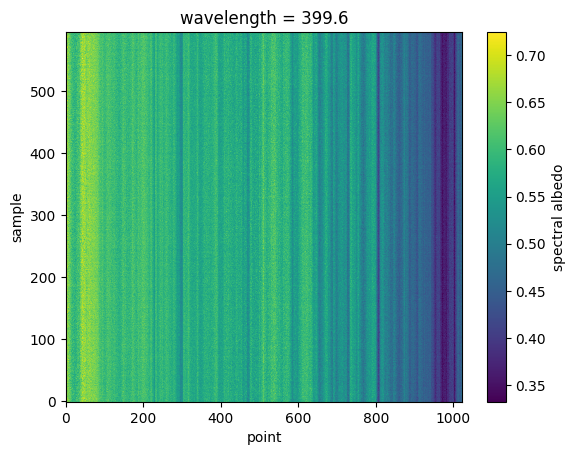

In [18]:
white_weathering_crust.spectral_albedo.sel(wavelength=400, method="nearest").plot()


of lets to basic some statistics:

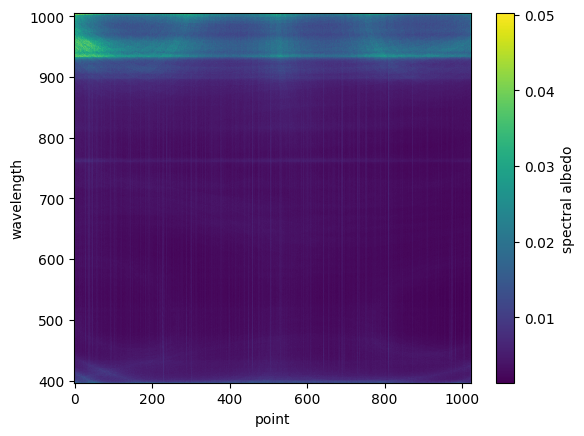

In [19]:
white_weathering_crust.spectral_albedo.std(dim="sample").plot()


Lets calculate the mean over each sample

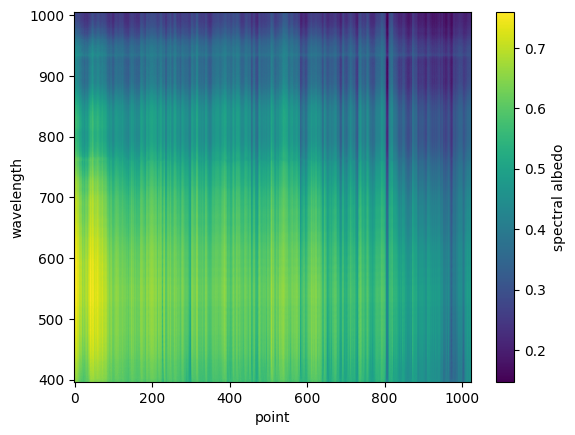

In [20]:
white_weathering_crust.spectral_albedo.mean(dim="sample").plot()


In [21]:
white_weathering_crust.spectral_albedo.std(dim="sample").max().compute()


<xarray.DataArray 'spectral albedo' ()>
array(0.05020379)

## Broadband Albedo

The broadband albedo is another property calclulated when needed. 


Lets make a plot of the first sample over all points

(0.0, 1.0)

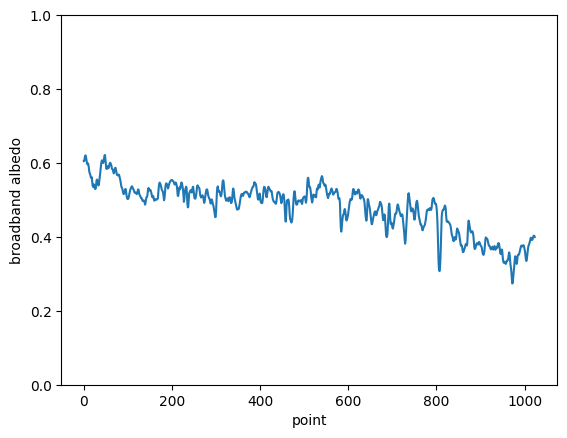

In [22]:
white_weathering_crust.broadband_albedo.sel(sample=0).plot.line()
plt.ylim(0, 1)


Now this should be enough to get you started. Have fun!